In [1]:
#BEGIN
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', **{ "size":16}) #**{,,'serif':['Palatino']
rc('text', usetex=True)
import numpy.random as rnd
rnd.seed()
import scipy.sparse as sp
import scipy.sparse.linalg as sla
import scipy.linalg as la
from scipy.optimize import brentq as solve
from scipy.integrate import odeint as ode
from scipy.special import gamma
np.set_printoptions(precision = 3, suppress = 1)
from matplotlib import cm
color = cm.get_cmap("Blues")

# Percolation transition on a tree 

The goal of this exercise is to practice the RG language on a toy model of percolation. 

## The model
We consider a tree with branching number 
#### $$b = 3$$
so that there are $b^k$ vertices at generation $k$, for $k=0, 1, 2, \dots, n$ ($k=0$ is the root, $n$ is the leaf level).

The percolation happens in a "bottom-up" fashion:
- each leaf (at level $n$) is activated with probability $p$, independently of one another. $p$ is thus the bare coupling constant.
- A vertex in the previous level ($n-1$) is activated if at least two of its descendents are (majority rule). When that happens, we connect that vertex with its activated descendents. This is how we construct clusters (see demo below).

To make connection with block-spin RSRG, the leaves are identified microscopic sites on a 1D lattice (the model can be viewed as percolation in 1d with "long range interaction"). so the system size is 
#### $$ L = b^n \,. $$
A vertex at level $n-\ell$ is a block-spin at scale 
#### $$ r_\ell = b^{\ell} \,,\, \ell = 0, \dots, n $$

## Nice pictures first

Play a bit with the direct simulation below, by tuning $p$. 
Can you see a percolation transition? At which value?

Text(0, 0.5, '$\\ell$')

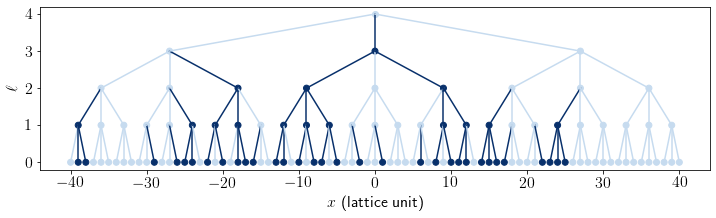

In [83]:

p = .4
n = 4
plt.figure(1, figsize = (12, 3))
for l in range(n+1):
    N = 3 ** (n-l)
    xs = np.arange(N) * 3 ** l - N // 2 * 3 ** l
    if not l:
        active = rnd.rand(N) < p
    else:
        active = np.sum( active.reshape(-1, 3), axis = 1) > 1
       
    
    if l < n:
        for k,x in enumerate(xs):
            j = k % 3 - 1
            plt.plot([x, x - j * 3 ** (l)], [l, l+1], c = color((active[k]*3 + 1) / 4))
    plt.scatter(xs, np.ones(N) * l, c = (active* 3+ 1) /4 , cmap = "Blues", vmin = 0, vmax=1)
plt.xlabel(r"$x$ (lattice unit)" )
plt.ylabel(r"$\ell$")

## RSRG: flow of $p$

- Show that the RSRG equation for the coupling constant $p$ at scale $r = b^\ell$ is 
#### $$ p_{r b} = f(p_{r}) \,,\ f(p) = 3p^2 - 2p^3 \,,\,   $$
(Below is a plot of $f$)

- Describe the phase diagram (What is $p_c$?)
- Show that the correlation length exponent is such that
#### $$ b^{1/\nu} = f'(p_c)  $$

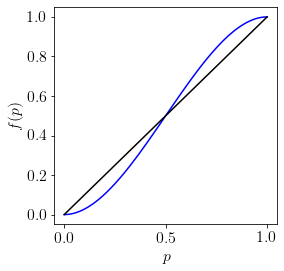

In [84]:
ps = np.linspace(0,1,100)
plt.figure(1, figsize = (4,4))
f = lambda p: 3 * p ** 2 - 2 * p ** 3
fps = f(ps)
plt.plot(ps, fps, c ="b")
plt.xlabel("$p$")
plt.ylabel("$f(p)$")
plt.plot(ps, ps, c = "k")

## Spin operator

Take two distinct leaves (microscopic sites), and consider the path from each of them to the root. The two paths will have $q$ steps in overlap. 
- What is their distance $r$ in lattice unit? Do you agree with the following (why/why not)?
#### $$ r \propto 3^{n-q}$$

The two point function $G(r)$ is by definition the probability that the two sites with distance $r$ (with the definition above) are in the same cluster. 

- Show that
#### $$ G(r) = m(r)^2 $$
where $m(r)$ is the probability that a vertex is connected to its $\ell$-th ancestor, where $r = 3^{\ell}$.

- Note that $m(r = L)$ is the probability that a is is connected to the root, or, in percolation jargon, belongs to the infinite cluster; this is the order parameter in percolation, analogue to the spontaneous magnetization in the Ising model.

### At criticality
We first tune to the critical point $p = p_c$ exactly.
- write a recursion relation for $m(r)$:
#### $$m(r) = m(r / b) b^{-\Delta_\sigma}  \,,\, b = 3 $$
where 
#### $$ b^{-\Delta_\sigma} = (2 p_c - p_c^2)  $$

- Deduce that the order parameter decays with the system size as 
#### $$ m(L) \propto L^{-\Delta_{\sigma}} $$
while the two point function at critical point has a power law decay
#### $$ G(r) \propto r^{-2\Delta_\sigma} $$

### Near criticality


First, set $p = p_c + t$, $0< t \ll 1$, that is, near criticality, in the percolating side.

- Argue that the order parameter satisfies:
#### $$ m(L) \sim \begin{cases} 
L^{-\Delta_\sigma}  &  L \ll t^{-\nu} \\
t^{\beta} & L \gg t^{-\nu} 
\end{cases} $$
where the exponent $\beta$ satisfies the hyperscaling relation
#### $$\beta = \nu \Delta_{\sigma}$$
Comment on the behavior of the two point function.

Next, set $p = p_c - t$, $0< t \ll 1$, in the insulating side.

- Repeat the above exercise. In particular show that the two point function decays exponentially beyond the correlation length.